<a href="https://colab.research.google.com/github/Aquib88raza/image-classification-ANKLE/blob/main/svm%2Bdensenet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/10
5/5 [==============================] - 54s 9s/step - loss: 0.9636 - accuracy: 0.5250 - val_loss: 0.7882 - val_accuracy: 0.3889
Epoch 2/10
5/5 [==============================] - 43s 8s/step - loss: 0.9463 - accuracy: 0.4563 - val_loss: 0.7409 - val_accuracy: 0.4444
Epoch 3/10
5/5 [==============================] - 40s 8s/step - loss: 0.7523 - accuracy: 0.5875 - val_loss: 0.7015 - val_accuracy: 0.6111
Epoch 4/10
5/5 [==============================] - 37s 8s/step - loss: 0.7177 - accuracy: 0.5813 - val_loss: 0.6761 - val_accuracy: 0.6667
Epoch 5/10
5/5 [==============================] - 39s 8s/step - loss: 0.8074 - accuracy: 0.5000 - val_loss: 0.6546 - val_accuracy: 0.7222
Epoch 6/10
5/5 [==============================] - 40s 8s/step - loss: 0.7218 - accuracy: 0.6000 - val_loss: 0.6409 - val_accuracy: 0.7222
Epoch 7/10
5/5 [==============================] - 42s 9s/step - loss: 0.7418 - accuracy: 0.5562 - val_loss:

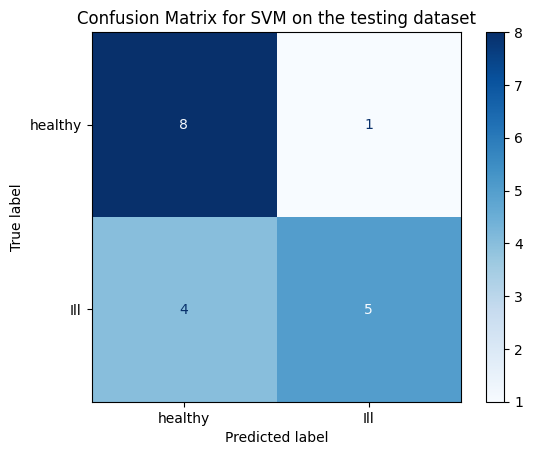

In [25]:
import os
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your image directories for healthy and ill samples
normal_path = "/content/drive/MyDrive/Y2022AnkleCLEAN/normal"
ill_path = "/content/drive/MyDrive/Y2022AnkleCLEAN/ill"

# Create lists to store image data and labels
dataset_images = []
dataset_labels = []

# Reading images from the normal directory
for files in os.listdir(normal_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(normal_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (256, 256)  # Define the size for resizing images
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image)
            dataset_labels.append(0)  # Label for healthy images

# Reading images from the ill directory
for files in os.listdir(ill_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(ill_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (256, 256)  # Define the size for resizing images
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image)
            dataset_labels.append(1)  # Label for ill images

# Convert the lists to NumPy arrays
dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)

# Normalize pixel values to the range [0, 1]
dataset_images = dataset_images / 255.0

seed = 42  # You can use any integer value as the seed

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset_images, dataset_labels, test_size=0.1, random_state=seed)

# Load a pre-trained DenseNet model (DenseNet121 in this case) without the top classification layers
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(256, 256, 3))

# Create a new model by adding your own classification layers on top of the pre-trained DenseNet
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Freeze the layers of the pre-trained DenseNet
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training dataset
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Extract features from the model for both training and testing datasets
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Create and train the SVM classifier on the extracted features
svm_classifier = SVC()
svm_classifier.fit(X_train_features, y_train)

# Predict on the testing dataset
y_test_pred = svm_classifier.predict(X_test_features)

# Generate a classification report for the testing dataset
test_report = classification_report(y_test, y_test_pred)
print("Classification Report for SVM on the testing dataset:\n", test_report)

# Calculate the confusion matrix for the testing dataset
test_cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix for the testing dataset
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["healthy", "Ill"])
test_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM on the testing dataset")
plt.show()


Epoch 1/10
5/5 [==============================] - 42s 8s/step - loss: 0.6239 - accuracy: 0.6562 - val_loss: 0.5917 - val_accuracy: 0.7222
Epoch 2/10
5/5 [==============================] - 39s 8s/step - loss: 0.6343 - accuracy: 0.6187 - val_loss: 0.5858 - val_accuracy: 0.7222
Epoch 3/10
5/5 [==============================] - 39s 8s/step - loss: 0.5829 - accuracy: 0.6438 - val_loss: 0.5796 - val_accuracy: 0.7222
Epoch 4/10
5/5 [==============================] - 41s 8s/step - loss: 0.5965 - accuracy: 0.6938 - val_loss: 0.5761 - val_accuracy: 0.7222
Epoch 5/10
5/5 [==============================] - 43s 9s/step - loss: 0.6097 - accuracy: 0.6812 - val_loss: 0.5737 - val_accuracy: 0.6667
Epoch 6/10
5/5 [==============================] - 43s 9s/step - loss: 0.5826 - accuracy: 0.7188 - val_loss: 0.5686 - val_accuracy: 0.6667
Epoch 7/10
5/5 [==============================] - 39s 8s/step - loss: 0.5709 - accuracy: 0.7063 - val_loss: 0.5667 - val_accuracy: 0.6667
Epoch 8/10
5/5 [==================

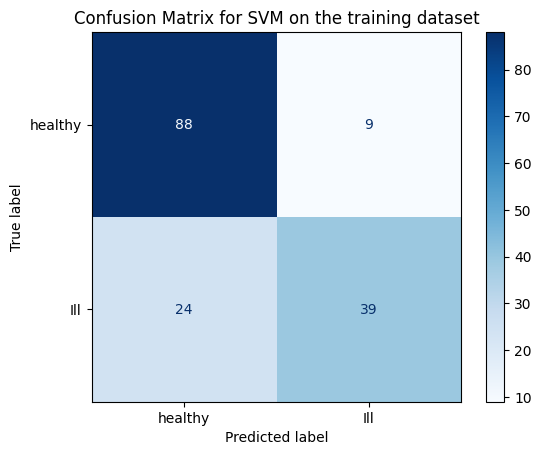

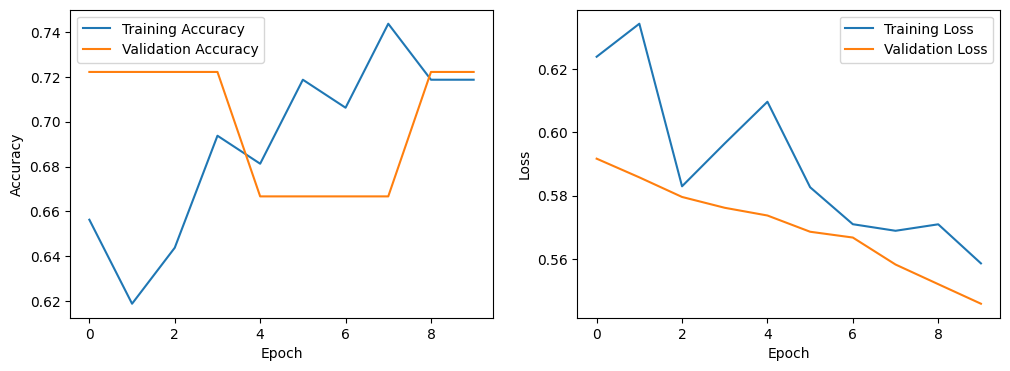

In [26]:

# Train the model on the training dataset
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Extract features from the model for both training and testing datasets
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Create and train the SVM classifier on the extracted features
svm_classifier = SVC()
svm_classifier.fit(X_train_features, y_train)

# Predict on the training dataset
y_train_pred = svm_classifier.predict(X_train_features)

# Generate a classification report for the training dataset
train_report = classification_report(y_train, y_train_pred)
print("Classification Report for SVM on the training dataset:\n", train_report)

# Calculate the confusion matrix for the training dataset
train_cm = confusion_matrix(y_train, y_train_pred)

# Display the confusion matrix for the training dataset
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["healthy", "Ill"])
train_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM on the training dataset")
plt.show()

# Plot the learning curve
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
